# Finetuning Paligemma in Pytorch with Cartoonised Images (OBJECT DETECTION)
*   Note: Kindly go to "File >> Save copy in Drive" before running
* Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `L4 GPU`, and then click `Save`.


In [ ]:
! git clone https://github.com/keyi10/MODELS.git

Cloning into 'MODELS'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 1), reused 17 (delta 1), pack-reused 0
Receiving objects: 100% (17/17), 6.75 MiB | 22.22 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
!pip install -q --upgrade git+https://github.com/huggingface/transformers.git
!pip install -q datasets lightning
!pip install -q peft accelerate bitsandbytes
!pip install -q --upgrade wandb
!pip install supervision
!pip install huggingface_hub
!pip install transformers==4.42.4

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 413.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source o

In [ ]:
REPO_ID = "google/paligemma-3b-pt-224"

# FINETUNED_MODEL_ID = "keyi10/paligemma_finetuning_example"

# CHANGE to your own FINETUNED_MODEL_ID
# Create new model in your huggingface (hf)
# Link to create new model in hf: https://huggingface.co/new
FINETUNED_MODEL_ID = "your_username/path"

MAX_LENGTH = 512

## Data Preparation

In [ ]:
dir = "/content"

In [ ]:
# Duplicating the 20 same images and json to have more data
import os
import shutil

def duplicate_files(source_folder, destination_folder, num_duplicates_per_file, file_extension):
    # Get list of files in source folder
    files = os.listdir(source_folder)
    # Filter files based on extension
    files_to_duplicate = [f for f in files if f.lower().endswith(file_extension)]

    # Create destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)

    # Loop through each file and duplicate it num_duplicates_per_file times
    for file_name in files_to_duplicate:
        # Get full path of the file
        source_path = os.path.join(source_folder, file_name)

        # Duplicate the file multiple times
        for i in range(num_duplicates_per_file):
            # Construct destination path with a unique name
            new_file_name = f"{os.path.splitext(file_name)[0]}_{i}{os.path.splitext(file_name)[1]}"
            destination_path = os.path.join(destination_folder, new_file_name)

            # Copy the file to the destination path
            shutil.copyfile(source_path, destination_path)
            print(f"Duplicated: {new_file_name}")

# Example usage for images:
source_image_folder = "/content/MODELS/DATASETS/IMAGES"
destination_image_folder = os.path.join(dir, "all_images")
num_image_duplicates = 20
image_extension = ('.jpg')  # Adjust extensions as needed

# Example usage for JSON files:
source_json_folder = "/content/MODELS/DATASETS/LABELS"
destination_json_folder = os.path.join(dir, "all_labels")
num_json_duplicates = 20
json_extension = ('.json')  # Adjust extensions as needed

# Duplicate images
duplicate_files(source_image_folder, destination_image_folder, num_image_duplicates, image_extension)

# Duplicate JSON files
duplicate_files(source_json_folder, destination_json_folder, num_json_duplicates, json_extension)


Duplicated: PicDescriptn_prompt04_Coloured_0.jpg
Duplicated: PicDescriptn_prompt04_Coloured_1.jpg
Duplicated: PicDescriptn_prompt04_Coloured_2.jpg
Duplicated: PicDescriptn_prompt04_Coloured_3.jpg
Duplicated: PicDescriptn_prompt04_Coloured_4.jpg
Duplicated: PicDescriptn_prompt04_Coloured_5.jpg
Duplicated: PicDescriptn_prompt04_Coloured_6.jpg
Duplicated: PicDescriptn_prompt04_Coloured_7.jpg
Duplicated: PicDescriptn_prompt04_Coloured_8.jpg
Duplicated: PicDescriptn_prompt04_Coloured_9.jpg
Duplicated: PicDescriptn_prompt04_Coloured_10.jpg
Duplicated: PicDescriptn_prompt04_Coloured_11.jpg
Duplicated: PicDescriptn_prompt04_Coloured_12.jpg
Duplicated: PicDescriptn_prompt04_Coloured_13.jpg
Duplicated: PicDescriptn_prompt04_Coloured_14.jpg
Duplicated: PicDescriptn_prompt04_Coloured_15.jpg
Duplicated: PicDescriptn_prompt04_Coloured_16.jpg
Duplicated: PicDescriptn_prompt04_Coloured_17.jpg
Duplicated: PicDescriptn_prompt04_Coloured_18.jpg
Duplicated: PicDescriptn_prompt04_Coloured_19.jpg
Duplicated

In [ ]:
import os
import json

# Iterate through each file in the directory
for filename in os.listdir(destination_json_folder):
    if filename.endswith('.json'):
        # Extract the filename without extension
        base_filename, _ = os.path.splitext(filename)

        filepath = os.path.join(destination_json_folder, filename)

        # Read the JSON file
        with open(filepath, 'r') as file:
            try:
                data = json.load(file)
            except json.JSONDecodeError:
                print(f"Error decoding JSON in file: {filename}")
                continue

        # Update the 'image' field with .jpg extension
        if isinstance(data, list):
            for item in data:
                item['image'] = f"{base_filename}.jpg"
        elif isinstance(data, dict):
            data['image'] = f"{base_filename}.jpg"

        # Write back the updated JSON to the file
        with open(filepath, 'w') as file:
            json.dump(data, file, indent=4)


In [ ]:
import os
import sys
import json
import csv

images_dir = os.path.join(dir,"all_images")
annotations_dir = os.path.join(dir,"all_labels")

# Check if the dir exists
if not os.path.exists(images_dir):
  print("Image directory does not exists")

if not os.path.exists(annotations_dir):
  print("Annotation directory does not exists")

# Get all the file names within image_dir
image_files = os.listdir(images_dir)
annotation_files = os.listdir(annotations_dir)

print(len(image_files))
print(len(annotation_files))

120
120


In [ ]:
import os
import json
import numpy as np
from PIL import Image
from typing import Tuple, List

# to_pali_gemma_xyxy function
def to_pali_gemma_xyxy(
    xyxy: List[int],
    resolution_wh: Tuple[int, int],
    classes: str
) -> str:
    width, height = resolution_wh
    x1, y1, x2, y2 = xyxy
    y1, x1, y2, x2 = y1/height, x1/width, y2/height, x2/width
    y1, x1, y2, x2 = int(y1*1024), int(x1*1024), int(y2*1024), int(x2*1024)
    return f"<loc{y1:04d}><loc{x1:04d}><loc{y2:04d}><loc{x2:04d}> {classes}"


# List to store new data
new_data = []

# Process each annotation file
for annotation_file in annotation_files:
    with open(os.path.join(annotations_dir, annotation_file), "r") as f:
        data = json.load(f)[0]

    image = data["image"]
    image_path = os.path.join(images_dir, image)

    # Open the image and get its dimensions
    img = Image.open(image_path)
    img_width, img_height = img.size

    # Process each annotation
    annotations = data["annotations"]
    for annotation in annotations:
        bbox = annotation["coordinates"]
        x = bbox["x"]
        y = bbox["y"]
        w = bbox["width"]
        h = bbox["height"]
        x = x - w / 2
        y = y - h / 2
        caption = annotation["label"].split(".")[0]

        x1, y1, x2, y2 = x, y, x + w, y + h

        # Formatting each coordinate and dimension as four-digit locations
        loc_format = to_pali_gemma_xyxy([x1, y1, x2, y2], (img_width, img_height), caption)

        suffix = loc_format
        prefix = f"detect {caption} "

        transformed_data = {
            'image': image_path,
            'prefix': prefix,
            'suffix': suffix
        }

        new_data.append(transformed_data)

# Check the length of new_data
len(new_data)

420

In [ ]:
# prompt: save combine into a jsonl file

import json

file_path = os.path.join(dir, "labels.jsonl")

with open(file_path, 'w') as f:
  for item in new_data:
    json.dump(item, f)
    f.write('\n')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

data = pd.read_json(file_path, lines=True)

train, test = train_test_split(data, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.1, random_state=42)

train_path = os.path.join(dir, "train.jsonl")
val_path = os.path.join(dir, "val.jsonl")
test_path = os.path.join(dir, "test.jsonl")

train.to_json(train_path, orient="records", lines=True)
val.to_json(val_path, orient="records", lines=True)
test.to_json(test_path, orient="records", lines=True)

In [ ]:
import json

train_data = []
with open(train_path, 'r') as f:
  # Iterate over each line in the file
  for line in f:
    # Parse each line as a separate JSON object and append it to the list
    train_data.append(json.loads(line))

print(train_data)

val_data = []
with open(val_path, 'r') as f:
  # Iterate over each line in the file
  for line in f:
    # Parse each line as a separate JSON object and append it to the list
    val_data.append(json.loads(line))

print(val_data)

[{'image': '/content/all_images/PicDescriptn_prompt03_Coloured_12.jpg', 'prefix': 'detect three girls are playing with a ball ', 'suffix': '<loc0275><loc0082><loc0759><loc0500> three girls are playing with a ball'}, {'image': '/content/all_images/PicDescriptn_prompt06_Coloured_3.jpg', 'prefix': 'detect a girl is drawing while sitting on the floor ', 'suffix': '<loc0319><loc0404><loc0772><loc0627> a girl is drawing while sitting on the floor'}, {'image': '/content/all_images/PicDescriptn_prompt01_Coloured_13.jpg', 'prefix': 'detect a boy with his hand under his chin is doing his homework ', 'suffix': '<loc0197><loc0354><loc1004><loc0768> a boy with his hand under his chin is doing his homework'}, {'image': '/content/all_images/PicDescriptn_prompt03_Coloured_0.jpg', 'prefix': "detect a teacher is examining the boy's injury while his friend is comforting him ", 'suffix': "<loc0316><loc0432><loc0974><loc0945> a teacher is examining the boy's injury while his friend is comforting him"}, {'i

In [ ]:
import pandas as pd

train_csv_path = os.path.join(dir, "train.csv")
val_csv_path = os.path.join(dir, "val.csv")

pd.DataFrame(train_data).to_csv(train_csv_path)
pd.DataFrame(val_data).to_csv(val_csv_path)

In [ ]:
from torch.utils.data import Dataset
from typing import Any, List, Dict
import random
import json
from PIL import Image
import pandas as pd

class CustomImageAnnotation(Dataset):
  def __init__(self, dataset):
    self.dataset = pd.read_csv(dataset)
    self.dataset = pd.concat([self.dataset] * 10, ignore_index=True)
    self.ground_truth = self.dataset['suffix'].to_list()
    self.detection_prompt = self.dataset['prefix'].to_list()
    self.image_dir = self.dataset['image'].to_list()
  def __len__(self):
        return len(self.dataset)
  def __getitem__(self, idx: int):
        image = Image.open(self.image_dir[idx])
        if image.mode != "RGB":
            image = image.convert("RGB")
        target_sequence = self.ground_truth[idx]
        detection_label = self.detection_prompt[idx]
        return detection_label, target_sequence, image

In [ ]:
train_dataset = CustomImageAnnotation(train_csv_path)
val_dataset = CustomImageAnnotation(val_csv_path)

In [ ]:
train_dataset[0]

('detect three girls are playing with a ball ',
 '<loc0275><loc0082><loc0759><loc0500> three girls are playing with a ball',
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080>)

In [ ]:
val_dataset[0]

('detect a boy is carrying a tray with a bowl of noodles on it ',
 '<loc0413><loc0014><loc0966><loc0176> a boy is carrying a tray with a bowl of noodles on it',
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080>)

## Create collate functions

In [ ]:
# Login to your huggingface and retrieve a token
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
# Kindly ensure that you have granted access to the https://huggingface.co/google/paligemma-3b-pt-224 model (this is a one-time action)
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained(REPO_ID)

preprocessor_config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.26M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

In [ ]:
from torch.utils.data import DataLoader

def train_collate_fn(examples):
  texts = [example[0] for example in examples] # prefix
  labels = [example[1] for example in examples] # suffix
  images = [example[2] for example in examples] # image path/name

  inputs = processor(text=texts, images=images, suffix=labels, return_tensors="pt", padding=True,
                     truncation="only_second", max_length=MAX_LENGTH,
                     tokenize_newline_separately=False)

  input_ids = inputs["input_ids"]
  token_type_ids = inputs["token_type_ids"]
  attention_mask = inputs["attention_mask"]
  pixel_values = inputs["pixel_values"]
  labels = inputs["labels"]

  return input_ids, token_type_ids, attention_mask, pixel_values, labels


def eval_collate_fn(examples):
  texts = [example[0] for example in examples] # prefix
  answers = [example[1] for example in examples] # suffix
  images = [example[2] for example in examples] # image path/name

  inputs = processor(text=texts, images=images, return_tensors="pt", padding=True, tokenize_newline_separately=False)

  input_ids = inputs["input_ids"]
  attention_mask = inputs["attention_mask"]
  pixel_values = inputs["pixel_values"]

  return input_ids, attention_mask, pixel_values, answers

In [ ]:
train_dataloader = DataLoader(train_dataset, collate_fn=train_collate_fn, batch_size=2, shuffle=True)
input_ids, token_type_ids, attention_mask, pixel_values, labels = next(iter(train_dataloader))

In [ ]:
processor.batch_decode(input_ids)

['<image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><ima

We can do the same for the validation collate function:

In [ ]:
val_dataloader = DataLoader(val_dataset, collate_fn=eval_collate_fn, batch_size=2, shuffle=False)
input_ids, attention_mask, pixel_values, answers = next(iter(val_dataloader))

In [ ]:
processor.batch_decode(input_ids)

['<image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><ima

## Define PyTorch LightningModule


In [ ]:
import lightning as L
import torch
from torch.utils.data import DataLoader
import re
from nltk import edit_distance
import numpy as np


class PaliGemmaModelPLModule(L.LightningModule):
    def __init__(self, config, processor, model):
        super().__init__()
        self.config = config
        self.processor = processor
        self.model = model

        self.batch_size = config.get("batch_size")

    def training_step(self, batch, batch_idx):

        input_ids, token_type_ids, attention_mask, pixel_values, labels = batch

        outputs = self.model(input_ids=input_ids,
                                attention_mask=attention_mask,
                                token_type_ids=token_type_ids,
                                pixel_values=pixel_values,
                                labels=labels)
        loss = outputs.loss

        self.log("train_loss", loss)

        return loss

    def validation_step(self, batch, batch_idx, dataset_idx=0):

        input_ids, attention_mask, pixel_values, answers = batch

        # autoregressively generate token IDs
        generated_ids = self.model.generate(input_ids=input_ids, attention_mask=attention_mask,
                                       pixel_values=pixel_values, max_new_tokens=MAX_LENGTH)
        # turn them back into text, chopping of the prompt
        # important: we don't skip special tokens here, because we want to see them in the output
        predictions = self.processor.batch_decode(generated_ids[:, input_ids.size(1):], skip_special_tokens=True)

        scores = []
        for pred, answer in zip(predictions, answers):
            pred = re.sub(r"(?:(?<=>) | (?=</s_))", "", pred)
            scores.append(edit_distance(pred, answer) / max(len(pred), len(answer)))

            if self.config.get("verbose", False) and len(scores) == 1:
                print(f"Prediction: {pred}")
                print(f"    Answer: {answer}")
                print(f" Normed ED: {scores[0]}")

        self.log("val_edit_distance", np.mean(scores))

        return scores

    def configure_optimizers(self):
        # you could also add a learning rate scheduler if you want
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.config.get("lr"))

        return optimizer

    def train_dataloader(self):
        return DataLoader(train_dataset, collate_fn=train_collate_fn, batch_size=self.batch_size, shuffle=True, num_workers=4)

    def val_dataloader(self):
        return DataLoader(val_dataset, collate_fn=eval_collate_fn, batch_size=self.batch_size, shuffle=False, num_workers=4)

## Load model

In [ ]:
from transformers import PaliGemmaForConditionalGeneration
from transformers import BitsAndBytesConfig
from peft import get_peft_model, LoraConfig

# use this for Q-LoRa
bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_type=torch.bfloat16
)

lora_config = LoraConfig(
    r=8,
    target_modules=["q_proj", "o_proj", "k_proj", "v_proj", "gate_proj", "up_proj", "down_proj"],
    task_type="CAUSAL_LM",
)
model = PaliGemmaForConditionalGeneration.from_pretrained(REPO_ID, quantization_config=bnb_config, device_map={"":0})
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()
#trainable params: 11,298,816 || all params: 2,934,634,224 || trainable%: 0.38501616002417344

Unused kwargs: ['bnb_4bit_compute_type']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/paligemma/configuration_paligemma.py:137: FutureWarning: The `vocab_size` attribute is deprecated and will be removed in v4.44, Please use `text_config.vocab_size` instead.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/62.6k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

trainable params: 11,298,816 || all params: 2,934,765,296 || trainable%: 0.3850


## Instantiate LightningModule

Now that we have defined the LightningModule and loaded the pre-trained model, we can instantiate it. We store all hyperparameters regarding training (such as the number of epochs, batch size, gradient accumulation, etc.) in a dictionary.

In [ ]:
config = {"max_epochs": 10,
          # "val_check_interval": 0.2, # how many times we want to validate during an epoch
          "check_val_every_n_epoch": 1,
          "gradient_clip_val": 1.0,
          "accumulate_grad_batches": 8,
          "lr": 1e-4,
          "batch_size": 2,
          # "seed":2022,
          "num_nodes": 1,
          "warmup_steps": 50,
          "result_path": "./result",
          "verbose": True,
}

model_module = PaliGemmaModelPLModule(config, processor, model)

## Define callbacks
Define callbacks
Optionally, Lightning allows to define so-called callbacks, which are arbitrary pieces of code that can be executed during training.

Here I'm adding a PushToHubCallback which will push the model to the hub at the end of every epoch as well as at the end of training. Do note that you could of course also pass the private=True flag when pushing to the hub, if you wish to keep your model private. Hugging Face also offers the Enterprise Hub so that you can easily share models with your colleagues privately in a secure way. Make sure to set your token as an environment variable (which in Colab can be set by default using a Colab secret - it's very handy!).

**We'll also use the EarlyStopping callback of Lightning, which will automatically stop training once the evaluation metric (edit distance in our case) doesn't improve after 3 epochs.**


In [ ]:
from lightning.pytorch.callbacks import Callback
from lightning.pytorch.callbacks.early_stopping import EarlyStopping

from huggingface_hub import HfApi

api = HfApi()

class PushToHubCallback(Callback):
    def on_train_epoch_end(self, trainer, pl_module):
        print(f"Pushing model to the hub, epoch {trainer.current_epoch}")
        pl_module.model.push_to_hub(FINETUNED_MODEL_ID,
                                    commit_message=f"Training in progress, epoch {trainer.current_epoch}")

    def on_train_end(self, trainer, pl_module):
        print(f"Pushing model to the hub after training")
        pl_module.processor.push_to_hub(FINETUNED_MODEL_ID,
                                    commit_message=f"Training done")
        pl_module.model.push_to_hub(FINETUNED_MODEL_ID,
                                    commit_message=f"Training done")

early_stop_callback = EarlyStopping(monitor="val_edit_distance", patience=3, verbose=False, mode="min")

## Train!
* Note: this code take about 45 min to run.
* IF you do not wish to run the code you can access the model from
https://huggingface.co/keyi10/paligemma_finetuning_example (you will need to grant access, with automatically approval)
*   Comment the next cell before running the inference code



```
# IF access is granted kindly add a cell and run this code before running the inference code
FINETUNED_MODEL_ID = "keyi10/paligemma_finetuning_example"
```










In [ ]:
from lightning.pytorch.loggers import WandbLogger

# wandb_logger = WandbLogger(project=WANDB_PROJECT, name=WANDB_NAME)

trainer = L.Trainer(
        accelerator="gpu",
        devices=[0],
        max_epochs=config.get("max_epochs"),
        accumulate_grad_batches=config.get("accumulate_grad_batches"),
        check_val_every_n_epoch=config.get("check_val_every_n_epoch"),
        gradient_clip_val=config.get("gradient_clip_val"),
        precision="16-mixed",
        limit_val_batches=5,
        num_sanity_val_steps=0,
        # logger=wandb_logger,
        callbacks=[PushToHubCallback(), early_stop_callback],
)

trainer.fit(model_module)

INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO:lightning.pytorch.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:lightning.pytorch.utilities.rank_zero:You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize 

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:435: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/paligemma/configuration_paligemma.py:137: FutureWarning: The `vocab_size` attribute is deprecated and will be removed in v4.44, Please use `text_config.vocab_size` instead.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation: |          | 0/? [00:00<?, ?it/s]

Prediction: <loc0413><loc0014><loc0966><loc0176>a boy is carrying a tray with a bowl of noodles on it
    Answer: <loc0413><loc0014><loc0966><loc0176> a boy is carrying a tray with a bowl of noodles on it
 Normed ED: 0.011111111111111112


/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Prediction: <loc0183><loc0512>đậm the boy is refusing the vegetables his mother giving him
    Answer: <loc0183><loc0512><loc0995><loc0948> the boy is refusing the vegetables his mother giving him
 Normed ED: 0.1935483870967742
Prediction: <loc0311><loc0715><loc0613><loc0882>a girl is playing with the swing while her grandfather is pushing her from the back
    Answer: <loc0311><loc0715><loc0613><loc0882> a girl is playing with the swing while her grandfather is pushing her from the back
 Normed ED: 0.008333333333333333
Prediction: <loc0294><loc0838><loc0512><loc1008>a girl having the drink is chatting with another girl who is eating
    Answer: <loc0294><loc0838><loc0494><loc1008> a girl having the drink is chatting with another girl who is eating
 Normed ED: 0.038461538461538464
Prediction: <loc0139><loc0077><loc0905><loc0517>the girl is chatting happily with her father
    Answer: <loc0139><loc0077><loc0905><loc0517> the girl is chatting happily with her father
 Normed ED: 0.0123456

README.md:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/45.3M [00:00<?, ?B/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Prediction: <loc0413><loc0014><loc0966><loc0176>a boy is carrying a tray with a bowl of noodles on it
    Answer: <loc0413><loc0014><loc0966><loc0176> a boy is carrying a tray with a bowl of noodles on it
 Normed ED: 0.011111111111111112
Prediction: <loc0183><loc0512>đậm the boy is refusing the vegetables his mother giving him
    Answer: <loc0183><loc0512><loc0995><loc0948> the boy is refusing the vegetables his mother giving him
 Normed ED: 0.1935483870967742
Prediction: <loc0311><loc0715><loc0613><loc0882>a girl is playing with the swing while her grandfather is pushing her from the back
    Answer: <loc0311><loc0715><loc0613><loc0882> a girl is playing with the swing while her grandfather is pushing her from the back
 Normed ED: 0.008333333333333333
Prediction: <loc0294><loc0838><loc0512><loc1008>a girl having the drink is chatting with another girl who is eating
    Answer: <loc0294><loc0838><loc0494><loc1008> a girl having the drink is chatting with another girl who is eating
 No

adapter_model.safetensors:   0%|          | 0.00/45.3M [00:00<?, ?B/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Prediction: <loc0413><loc0014><loc0966><loc0176>a boy is carrying a tray with a bowl of noodles on it
    Answer: <loc0413><loc0014><loc0966><loc0176> a boy is carrying a tray with a bowl of noodles on it
 Normed ED: 0.011111111111111112
Prediction: <loc0183><loc0512>đậm the boy is refusing the vegetables his mother giving him
    Answer: <loc0183><loc0512><loc0995><loc0948> the boy is refusing the vegetables his mother giving him
 Normed ED: 0.1935483870967742
Prediction: <loc0311><loc0715><loc0613><loc0882>a girl is playing with the swing while her grandfather is pushing her from the back
    Answer: <loc0311><loc0715><loc0613><loc0882> a girl is playing with the swing while her grandfather is pushing her from the back
 Normed ED: 0.008333333333333333
Prediction: <loc0294><loc0838><loc0512><loc1008>a girl having the drink is chatting with another girl who is eating
    Answer: <loc0294><loc0838><loc0494><loc1008> a girl having the drink is chatting with another girl who is eating
 No

adapter_model.safetensors:   0%|          | 0.00/45.3M [00:00<?, ?B/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Prediction: <loc0413><loc0014><loc0966><loc0176>a boy is carrying a tray with a bowl of noodles on it
    Answer: <loc0413><loc0014><loc0966><loc0176> a boy is carrying a tray with a bowl of noodles on it
 Normed ED: 0.011111111111111112
Prediction: <loc0183><loc0512>đậm the boy is refusing the vegetables his mother giving him
    Answer: <loc0183><loc0512><loc0995><loc0948> the boy is refusing the vegetables his mother giving him
 Normed ED: 0.1935483870967742
Prediction: <loc0311><loc0715><loc0613><loc0882>a girl is playing with the swing while her grandfather is pushing her from the back
    Answer: <loc0311><loc0715><loc0613><loc0882> a girl is playing with the swing while her grandfather is pushing her from the back
 Normed ED: 0.008333333333333333
Prediction: <loc0294><loc0838><loc0512><loc1008>a girl having the drink is chatting with another girl who is eating
    Answer: <loc0294><loc0838><loc0494><loc1008> a girl having the drink is chatting with another girl who is eating
 No

adapter_model.safetensors:   0%|          | 0.00/45.3M [00:00<?, ?B/s]

Pushing model to the hub after training


Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.26M [00:00<?, ?B/s]

## Inference

In [ ]:
from transformers import AutoProcessor
from PIL import Image, ImageDraw, ImageFont

# change to the image name you wanted for inference
inference_image_dir = os.path.join(dir,"MODELS/DATASETS/IMAGES/PicDescriptn_prompt04_Coloured.jpg")
image = Image.open(inference_image_dir)
processor = AutoProcessor.from_pretrained(FINETUNED_MODEL_ID)

inputs = processor(text="detect three girls are playing skipping rope", images=image, return_tensors="pt")
for k,v in inputs.items():
  print(k,v.shape)

preprocessor_config.json:   0%|          | 0.00/424 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.26M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

input_ids torch.Size([1, 265])
attention_mask torch.Size([1, 265])
pixel_values torch.Size([1, 3, 224, 224])


In [ ]:
from transformers import PaliGemmaForConditionalGeneration

model = PaliGemmaForConditionalGeneration.from_pretrained(FINETUNED_MODEL_ID)

# Autoregressively generate
# We use greedy decoding here, for more fancy methods see https://huggingface.co/blog/how-to-generate
generated_ids = model.generate(**inputs, max_new_tokens=MAX_LENGTH)

# Next we turn each predicted token ID back into a string using the decode method
# We chop of the prompt, which consists of image tokens and our text prompt
image_token_index = model.config.image_token_index
num_image_tokens = len(generated_ids[generated_ids==image_token_index])
num_text_tokens = len(processor.tokenizer.encode("detect three girls are playing skipping rope"))
num_prompt_tokens = num_image_tokens + num_text_tokens + 2
generated_text = processor.batch_decode(generated_ids[:, num_prompt_tokens:], skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
generated_text

adapter_config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/45.3M [00:00<?, ?B/s]

'<loc0310><loc0011><loc0642><loc0220> three girls are playing skipping rope'

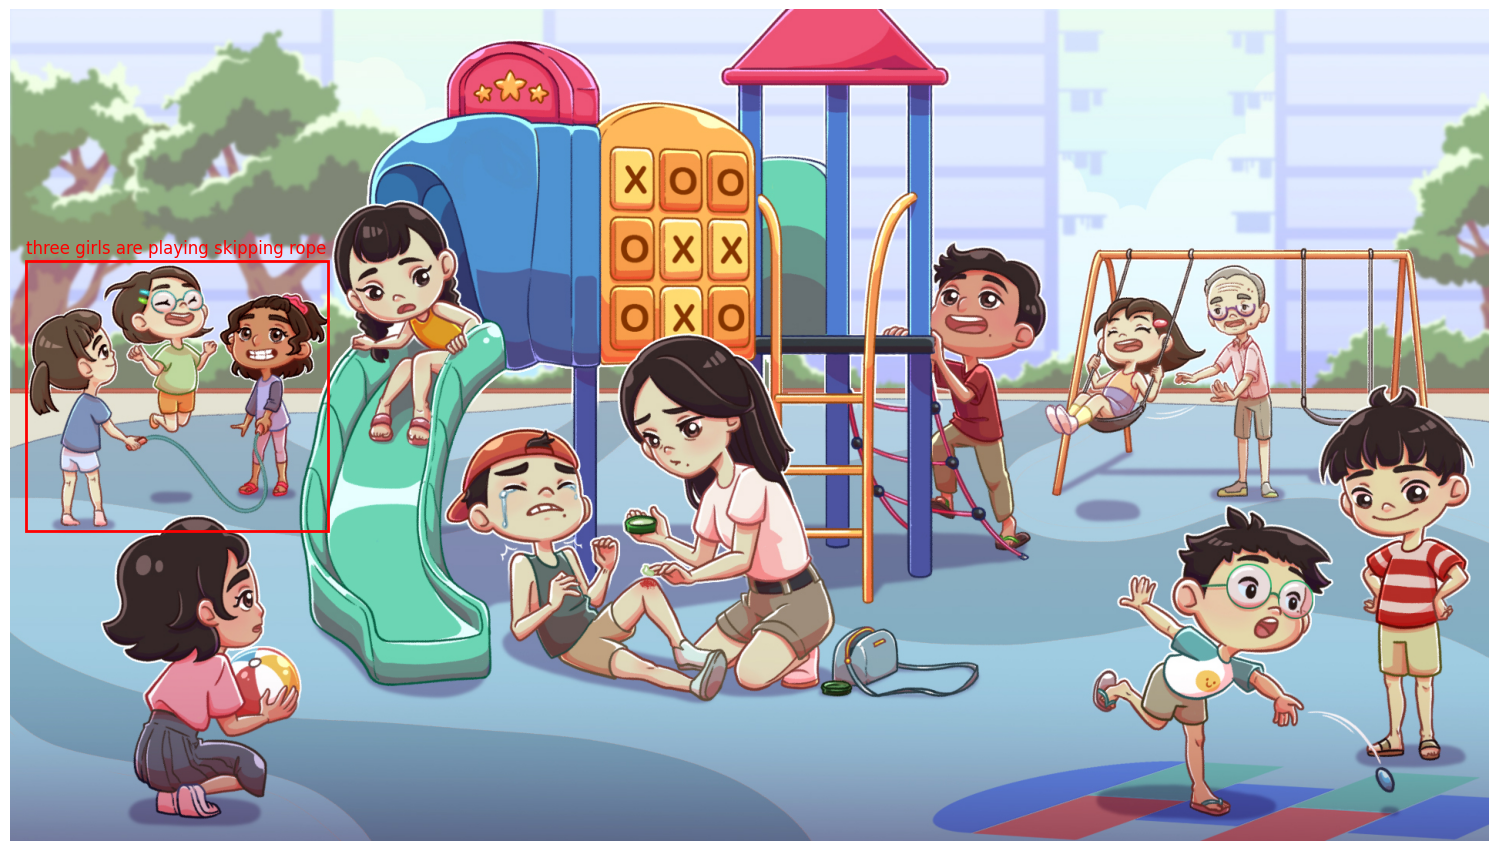

In [ ]:
import re
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from typing import List, Tuple

def plot_bounding_box(image_path: str, pali_gemma_str: str, resolution_wh: Tuple[int, int]):
    def from_pali_gemma_xyxy(pali_gemma_str: str, resolution_wh: Tuple[int, int]) -> Tuple[List[int], str]:
        width, height = resolution_wh

        # Extract coordinates and class from the string
        matches = re.findall(r"<loc(\d{4})>", pali_gemma_str)
        classes = pali_gemma_str.split(' ', 1)[-1]

        if len(matches) != 4:
            raise ValueError("Invalid Pali-Gemma format")

        y1, x1, y2, x2 = [int(coord) / 1024 for coord in matches]

        # Convert normalized coordinates back to original scale
        y1, y2 = y1 * height, y2 * height
        x1, x2 = x1 * width, x2 * width

        return [int(x1), int(y1), int(x2), int(y2)], classes

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    original_xyxy, classes = from_pali_gemma_xyxy(pali_gemma_str, resolution_wh)

    x1, y1, x2, y2 = original_xyxy

    dpi = 100
    fig, ax = plt.subplots(1, figsize=(resolution_wh[0] / dpi, resolution_wh[1] / dpi), dpi=dpi)
    ax.imshow(image)

    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')

    ax.add_patch(rect)

    plt.text(x1, y1 - 10, classes, color='red', fontsize=12)

    ax.axis('off')

    plt.show()

resolution_wh = (1920, 1080)
plot_bounding_box(inference_image_dir, generated_text, resolution_wh)
